# SPRINT5-2  　Desicion Tree
## ボストン住宅価格予測を決定木で行う

### データを取得する

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
%matplotlib inline

### 取得データをDataFrameにする

In [10]:
X = pd.DataFrame(load_boston().data, columns = load_boston().feature_names)
y = pd.DataFrame(load_boston().target, columns = ['MEDV'])

### データ探索

### 基本的なデータ探索

In [11]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### 基本的なデータ探索について記述せよ

・このデータセットについて  
作成年：1978年  
作成者：Gary Fauth, Gregory Ingram, Eugene Kroch, Robert McDonald, and Ann Schnare  
目的：大気汚染改善のために人々がお金を払うかどうかを調べるため  
・各カラムが表しているのは以下の通り   
CRIM： 人口１人当たりの犯罪発生数  
ZN：２５０００平方フィート以上の住居区画の占める割合  
INDUS：小売業以外の商業が占める面積の割合  
CHAS：チャールズ川によるダミー変数 (１: 川の周辺, ０: それ以外)  
NOX：NOx の濃度  
RM：住居の平均部屋数  
AGE：１９４０年より前に建てられた物件の割合  
DIS：５つのボストン市の雇用施設からの距離 (重み付け済)  
RAD：環状高速道路へのアクセスしやすさ  
TAX：１００００ドルあたりの不動産税率の総計  
PTRATIO：町毎の児童と教師の比率  
B：町毎の黒人 (Bk) の比率を次の式で表したもの。 1000(Bk – 0.63)^2  
LSTAT：給与の低い職業に従事する人口の割合 (%)  
MEDV：持ち家の値段の中央値（単位は1000ドル）

### 一変数の可視化

In [12]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [15]:
y.describe()

,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [16]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
MEDV    506 non-null float64
dtypes: float64(1)
memory usage: 4.0 KB


### describeメソッドを用いることで把握できたこと(考察)を記述せよ

・変数間のスケールが異なっている、またZNとAGEの分散が大きいので正規化・標準化が必要か要検討  
・変数の数とデータをみて計算量が多いか少ないかを把握できるので、それを考慮したモデルを選択する   
・CHASは０、１の２値をとっており、また、０の数が多い可能性があるため、この特徴量は学習に貢献しない  
　可能性があることを踏まえて特徴量選択を行う

### 二変数の可視化

### 二変数の可視化　相関

In [24]:
A = y.join(X)

In [25]:
A.corr()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
MEDV,1.000000,-0.385832,0.360445,-0.483725,0.175260,-0.427321,0.695360,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663
CRIM,-0.385832,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220
ZN,0.360445,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.483725,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,0.175260,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,-0.427321,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,0.695360,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,-0.376955,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,0.249929,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,-0.381626,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676


### 二変数の可視化について記述せよ　

・多くの場合、相関とはピアソンの積率相関係数のことを指しており、変数が正規分布に従い、線形の比例関係にある場合のみ正しい値をとる  
・MEDVと最も相関があるのはRM,PTRATIO,LSTATである。  
・RMだけMEDVと正の相関が強い。RMの値が大きいデータはMEDVも高いということがわかる。  
・PTRATIOとLSTATはMEDVと負の相関が強いため、それらの値が大きいとMEDVは低くなるということがわかる。  
・学習に相関があるものだけを使用することで学習コストを下げられる可能性がある。

### 相関の注意点について記述せよ

相関が正しく2変数の関係を表していない場合とは：  
１、相関の強弱が外れ値の影響を受けている場合  
　　　本当は相関がない場合でも、外れ値があると相関係数が正or負の大きな値をとり、相関があると誤解してしまう可能性がある  
２、２変数の関係に特徴があってもそれが線形ではない場合  
　　　相関係数は線形の関係性を表するものなので、例えば、グラフ化した時にUの字の分布をしている場合は、  
　 　　相関係数が正or負の大きな値をとることはないので、それだけで２変数間には何の関係性もないと判断してはいけない  
対策：１、散布図などで視覚的に確認する  
　　　２、HSICを用いる

### 二変数の可視化　プロット

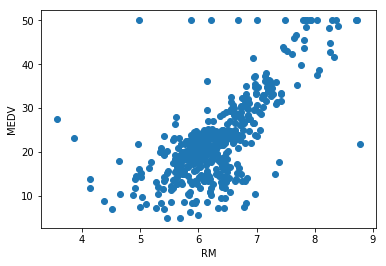

In [31]:
plt.scatter(x=X['RM'],y=y['MEDV'])
plt.xlabel('RM')
plt.ylabel('MEDV')

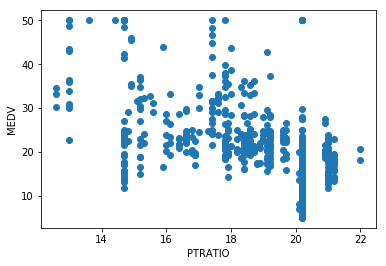

In [32]:
plt.scatter(x=X['PTRATIO'],y=y['MEDV'])
plt.xlabel('PTRATIO')
plt.ylabel('MEDV')

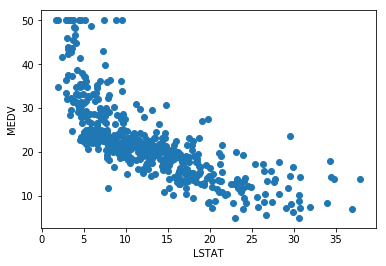

In [30]:
plt.scatter(x=X['LSTAT'],y=y['MEDV'])
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

### 二変数の可視化について記述せよ　

・RMに関しては、一部外れ値のようなデータが存在しており、すぐに信用できるかは不明  
・LSTAに関しては、概ね信用できる  
・PTRATIOに関しては、同じPTRATIOの値においてMEDVのばらつきが大きため、信用度は低い

### データセット分割

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split( X, y, random_state = 1)

### 学習

In [36]:
from sklearn.tree import DecisionTreeRegressor

In [43]:
DR1 = DecisionTreeRegressor(max_depth=1)
DR2 = DecisionTreeRegressor(max_depth=2)
DR3 = DecisionTreeRegressor(max_depth=3)
DR1.fit(X_train, y_train)
DR2.fit(X_train, y_train)
DR3.fit(X_train, y_train)
DR1_pred = DR1.predict(X_test)
DR2_pred = DR2.predict(X_test)
DR3_pred = DR3.predict(X_test)

### 決定係数

In [39]:
from sklearn.metrics import r2_score

深さ１

In [44]:
r2_score(DR1_pred, y_test)

-0.58759395923163882

深さ２

In [45]:
r2_score(DR2_pred, y_test)

0.57907686574112971

深さ３

In [46]:
r2_score(DR3_pred, y_test)

0.75816011633186131

### 学習曲線

In [48]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")

In [47]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

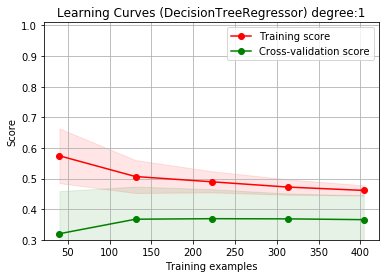

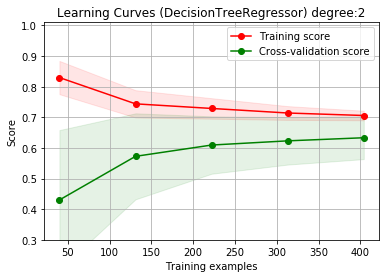

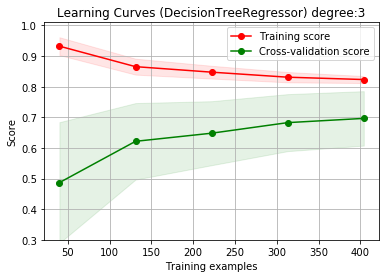

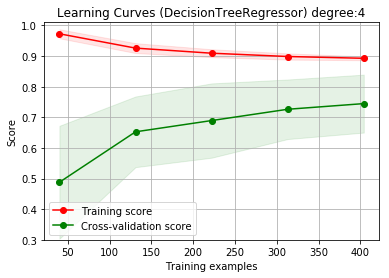

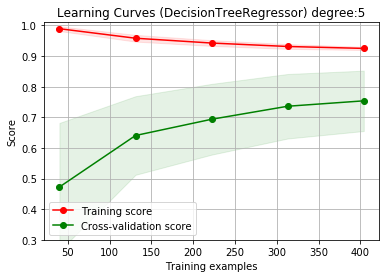

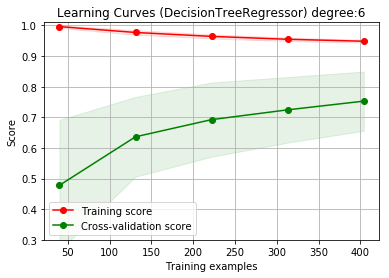

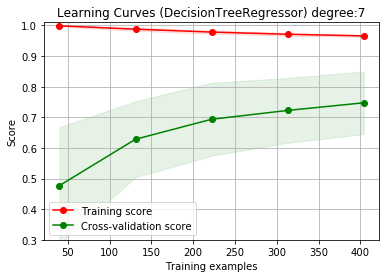

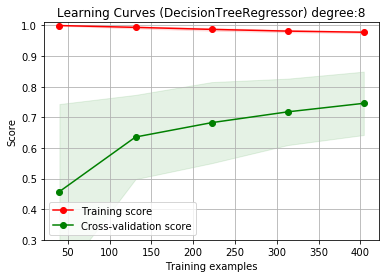

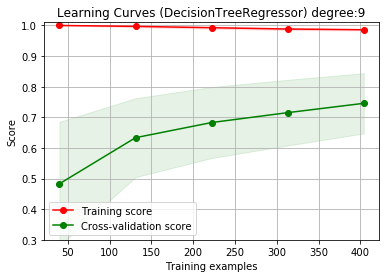

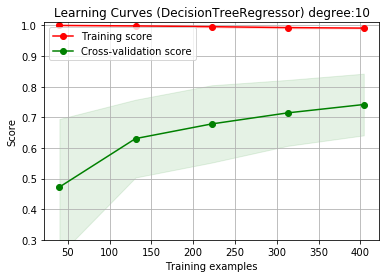

In [126]:
title = "Learning Curves (DecisionTreeRegressor)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=1)
for degree in range(1,11):
    estimator = DecisionTreeRegressor(max_depth=degree)
    plot_learning_curve(estimator, title + " degree:" + str(degree) , X , y, ylim=(0.3, 1.01), cv = cv, n_jobs=4)

### 学習曲線について記述せよ

・High varianceとは  
　学習データに対しては高精度が出せるが、検証では精度が落ちてしまう状態のこと、つまり過学習状態  
・High Biasとは  
　学習データに対して求める精度が出ていない状態のこと、つまり未学習状態  
・最も結果が良い深さは  
　６  
・理由は  
　Cross-validation score が最も良いため  
・データ数を増やしていった場合  
　Cross-validation scoreの傾向を見るとデータ数が６００程度まではスコアの上昇が期待できそうである

### グリッドサーチ

In [51]:
from sklearn.metrics import  make_scorer
from sklearn.model_selection import GridSearchCV

In [52]:
regressor = DecisionTreeRegressor()
params = {"max_depth":  list(range(1,11))}
scoring_fnc=make_scorer(r2_score)
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc,cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'max_depth': 6}


### グリッドサーチについて記述せよ

グリッドサーチとは、予め指定したハイパーパラメータの組み合わせを全て試しての中で最良の組み合わせを探す方法のこと  
他の探索手法としては例えば以下が挙げられる。  
・ランダムサーチ  
　　優れている点：良さそうなパラメータ値の目星を付けられないときに使える   
・遺伝的アルゴリズム  
　　優れている点：良さそうなパラメータ値の目星を付けられないときに使える  
  　　　　　　　　　良い値を見つけた場合にはさらに良い値を求めてその周辺を  
　　　　　　　　　探索するためランダムサーチよりも効率が良い場合が多い  
使い分けとしては、全く検討がつかない場合はランダムサーチ、そして、計算資源や時間に余裕がある場合には遺伝的アルゴリズム、  
おおよそ検討がつく場合にはグリッドサーチを選択する

### グリッドサーチを使いこなす

折りたたみ回数：３

In [57]:
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc,cv=3)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'max_depth': 5}


折りたたみ回数：１０

In [58]:
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc,cv=10)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'max_depth': 5}


以上の結果から、折りたたみ回数は５がベストと考えられる

評価方法を二乗誤差に変更(折りたたみ回数：３)

In [60]:
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring='neg_mean_squared_error',cv=3)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'max_depth': 4}


評価方法を二乗誤差に変更(折りたたみ回数：5)

In [59]:
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring='neg_mean_squared_error',cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'max_depth': 5}


評価方法を二乗誤差に変更(折りたたみ回数：10)

In [61]:
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring='neg_mean_squared_error',cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'max_depth': 7}


### テスト

In [118]:
regressor = DecisionTreeRegressor(max_depth=5,random_state=0)
regressor.fit(X_train,y_train)
reg_pred = regressor.predict(X_test)
r2_score(y_test, reg_pred)

0.87639873091111131